<a href="https://colab.research.google.com/github/Ashitha-K/Assignment/blob/main/ashithak_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [60]:
#Loading the dataset and making passenger id as index column
data=pd.read_csv('/content/titanic_dataset.csv',index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
# Checking the basic details of the dataset
data.shape



(891, 11)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [63]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [64]:
#checking missing values
data.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [65]:
#filling the missing values
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)
data['Cabin'].fillna(data['Cabin'].mode()[0],inplace=True)
data.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


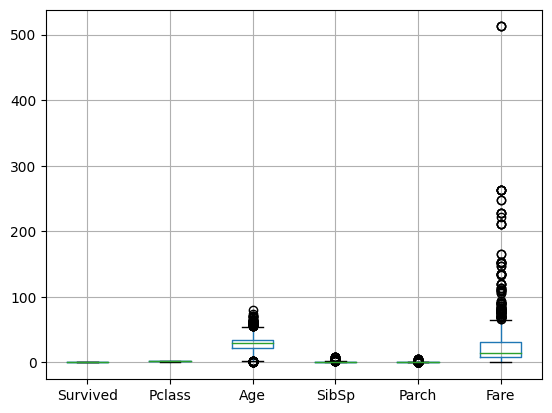

In [66]:
#checking for outliers
boxplot=data.boxplot()

In [76]:
#Treating the outliers
outliers=['Fare','Age','SibSp','Parch']
Q1=data[outliers].quantile(0.25)
Q3=data[outliers].quantile(0.75)
IQR=Q3-Q1
#outlierb boundaries
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
#Treating th eoutlier
data[outliers]=data[outliers].clip(lower=Q1-1.5*IQR,upper=Q3+1.5*IQR,axis=1)


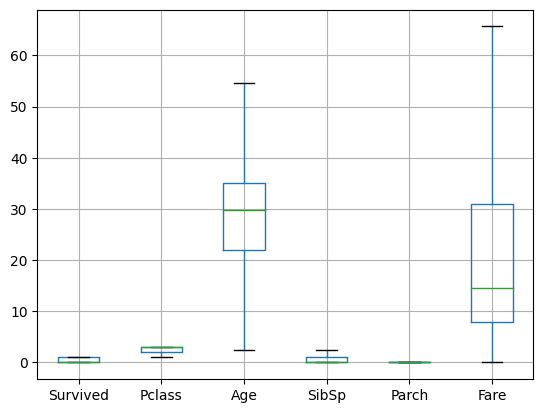

In [77]:
boxplot=data.boxplot()

**Deleting the non-numeric columns and applying minmax scaler**

In [78]:
#Scaling
from sklearn.preprocessing import MinMaxScaler

In [79]:
# Drop non-numeric columns for scaling
data_scaling=data.drop('Survived',axis=1)


In [80]:
numeric_features=data_scaling.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1)

In [81]:
numeric_features.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1.0,0,7.2500
2,1,38.0,1.0,0,65.6344
3,3,26.0,0.0,0,7.9250
4,1,35.0,1.0,0,53.1000
5,3,35.0,0.0,0,8.0500


In [82]:
scaler=MinMaxScaler()
#Applying minmaxscaler
scaled_features=scaler.fit_transform(numeric_features)
## Convert the scaled features back to a DataFrame
scaled_data=pd.DataFrame(scaled_features,columns=numeric_features.columns)
# Add the 'Survived' column back to the DataFrame
scaled_data['Survived']=data['Survived'].values
scaled_data.head()

,Pclass,Age,SibSp,Parch,Fare,Survived
0,1.0,0.375000,0.4,0.0,0.110460,0
1,0.0,0.682692,0.4,0.0,1.000000,1
2,1.0,0.451923,0.0,0.0,0.120745,1
3,0.0,0.625000,0.4,0.0,0.809027,1
4,1.0,0.625000,0.0,0.0,0.122649,0
